In [ ]:
##Setup darknet environment

#check whether GPU is provided
import os
!nvcc --version



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# download and compile darknet_for_colab
assert os.getcwd()=='/content', 'Directory should be "/content" instead of "{}"'.format(os.getcwd())
!unzip /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/darknet_for_colab.zip
%cd darknet_for_colab
!make
!chmod +x ./darknet

Archive:  /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/darknet_for_colab.zip
   creating: darknet_for_colab/
  inflating: darknet_for_colab/video_yolov3.sh  
  inflating: darknet_for_colab/CMakeLists.txt  
  inflating: darknet_for_colab/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/darknet_for_colab/
  inflating: __MACOSX/darknet_for_colab/._.DS_Store  
  inflating: darknet_for_colab/LICENSE  
   creating: darknet_for_colab/cmake/
  inflating: darknet_for_colab/cmake/vcpkg_linux.diff  
  inflating: darknet_for_colab/cmake/vcpkg_windows_cuda.diff  
  inflating: darknet_for_colab/cmake/vcpkg_linux_cuda.diff  
  inflating: darknet_for_colab/cmake/vcpkg_windows.diff  
   creating: darknet_for_colab/cmake/Modules/
  inflating: darknet_for_colab/cmake/Modules/FindCUDNN.cmake  
  inflating: darknet_for_colab/cmake/Modules/FindPThreads_windows.cmake  
  inflating: darknet_for_colab/cmake/Modules/FindStb.cmake  
  inflating: darknet_for_colab/cmake/vcpkg_osx.diff  
  inflating:

In [ ]:
##Download custom dataset (yolo format)
%cd data
assert os.getcwd()=='/content/darknet_for_colab/data', 'Directory should be "/content/darknet_for_colab/data" instead of "{}"'.format(os.getcwd())

# download custom data of common traffic signs
#!wget --no-check-certificate "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21109&authkey=ACmKGNgx4G2TT4A" -O ts.zip
!cp /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/Data_set/pedestrian.zip /content/darknet_for_colab/data
!unzip pedestrian.zip
!rm -f pedestrian.zip
!ls
%cd ..

Streaming output truncated to the last 5000 lines.
  inflating: pedestrian/test07_V000_90.png  
  inflating: __MACOSX/pedestrian/._test07_V000_90.png  
  inflating: pedestrian/test07_V002_330.png  
  inflating: __MACOSX/pedestrian/._test07_V002_330.png  
  inflating: pedestrian/test07_V000_1660.txt  
  inflating: __MACOSX/pedestrian/._test07_V000_1660.txt  
  inflating: pedestrian/test07_V006_170.txt  
  inflating: __MACOSX/pedestrian/._test07_V006_170.txt  
  inflating: pedestrian/test07_V003_1800.txt  
  inflating: __MACOSX/pedestrian/._test07_V003_1800.txt  
  inflating: pedestrian/test07_V000_690.txt  
  inflating: __MACOSX/pedestrian/._test07_V000_690.txt  
  inflating: pedestrian/test07_V002_540.txt  
  inflating: __MACOSX/pedestrian/._test07_V002_540.txt  
  inflating: pedestrian/test07_V001_1660.txt  
  inflating: __MACOSX/pedestrian/._test07_V001_1660.txt  
  inflating: pedestrian/test07_V002_1800.txt  
  inflating: __MACOSX/pedestrian/._test07_V002_1800.txt  
  inflating: ped

00148.txt: 
1 0.6672794117647058 0.480625 0.05220588235294118 0.07875

00277.txt: 
0 0.7790441176470588 0.513125 0.016911764705882352 0.02875

00475.txt: 
0 0.9349264705882353 0.631875 0.05661764705882353 0.09375

00265.txt: 
1 0.5996323529411764 0.55125 0.022794117647058822 0.0375
1 0.5834558823529412 0.56875 0.015441176470588236 0.0225
0 0.6 0.58625 0.016176470588235296 0.0275



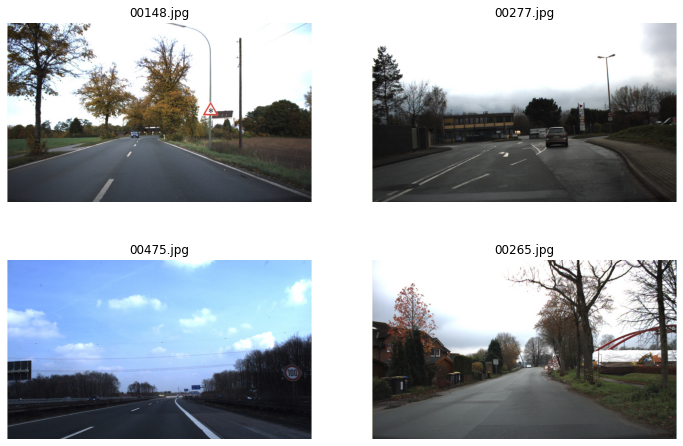

In [ ]:
##Visualize custom dataset examples (optional)

assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("data/ts/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [ ]:
'''
Modify yolov4 architecture
Double click on file yolov4_config.py to modify the hyperpameters directly from Colab environment
E.g: I will train my dataset with these parameters:
classes= 4,
max_batches=8000
batch=64
subdivisions=16
width=416
height=416
'''

assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# Run python script to create our customize yolov4_custom_train.cfg 
# and yolov4_custom_tes.cfg in folder /cfg
!python yolov4_setup.py

[INFO] Generating yolov4_custom_train.cfg successfully...
[INFO] Generating yolov4_custom_test.cfg successfully...


In [ ]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# create Symlinks so we can save trained weight in our Google Drive
# create folder YOLOv4_weight/back in your Drive to store trained weights
!rm /content/darknet_for_colab/backup -r
#!ln -s /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/YOLOv4_weight/pedestrian/backup /content/darknet_for_colab
!ln -s /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/YOLOv4_weight/pedestrain_mark02/backup /content/darknet_for_colab

rm: cannot remove '/content/darknet_for_colab/backup': No such file or directory


In [ ]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# show labels of our custom traffic sign dataset
!cat data/classes.names

pedestrian
person


In [ ]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# download example images an video
%cd darknet_for_colab
!wget --no-check-certificate "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21120&authkey=AM5VslNNW9a8aO8" -O examples.zip
!unzip examples.zip
!rm -r examples.zip

[Errno 2] No such file or directory: 'darknet_for_colab'
/content/darknet_for_colab
--2021-04-27 14:26:13--  https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21120&authkey=AM5VslNNW9a8aO8
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://sbjm1a.db.files.1drv.com/y4mr1TjrURmsCTkOubgA9FP3wyQDTHefD1vpICQ9NZ211FGqU0KBX14___NqRS9Wytb4yy7WZid9u58vrOhikJRs6JMbluiu8wkSXaS7Rr26bnww41UropcNf0fRurFf9U5pCJ9fAmBlEo_qbmXUP2ipEGOXyw7KJeAVn_ydwCl1zZjQ3KwvdtwFvrG29NGuNVnY8pK5cSo7fKLvvpG8caMuw/examples.zip?download&psid=1 [following]
--2021-04-27 14:26:13--  https://sbjm1a.db.files.1drv.com/y4mr1TjrURmsCTkOubgA9FP3wyQDTHefD1vpICQ9NZ211FGqU0KBX14___NqRS9Wytb4yy7WZid9u58vrOhikJRs6JMbluiu8wkSXaS7Rr26bnww41UropcNf0fRurFf9U5pCJ9fAmBlEo_qbmXUP2ipEGOXyw7KJeAVn_ydwCl1zZjQ3KwvdtwFvrG29NGuNVnY8pK5cSo7fKLvvpG8caMuw/exampl

In [ ]:
%cd darknet_for_colab
!unzip /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/Data_set/examples.zip
!rm -r examples.zip

[Errno 2] No such file or directory: 'darknet_for_colab'
/content/darknet_for_colab
Archive:  /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/Data_set/examples.zip
replace examples/TUD-Campus-raw.webm? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: examples/TUD-Campus-raw.webm  
  inflating: __MACOSX/examples/._TUD-Campus-raw.webm  
  inflating: examples/test07_V009_220.png  
  inflating: __MACOSX/examples/._test07_V009_220.png  
  inflating: examples/test07_V009_220.jpg  
  inflating: __MACOSX/examples/._test07_V009_220.jpg  
  inflating: examples/test07_V009_730.jpg  
  inflating: __MACOSX/examples/._test07_V009_730.jpg  
  inflating: examples/test07_V009_730.png  
  inflating: __MACOSX/examples/._test07_V009_730.png  
  inflating: examples/test07_V009_500.jpg  
  inflating: __MACOSX/examples/._test07_V009_500.jpg  
  inflating: examples/test07_V009_500.png  
  inflating: __MACOSX/examples/._test07_V009_500.png  
  inflating: examples/test07_V009_100.png  
  inflating: __MAC

In [ ]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# cfg/coco.data was harcode in darknet, thus we need 
# to duplicate one with the same content of data/yolov4.data
%cp data/yolov4.data cfg/coco.data

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 conv     64       3 x 3/ 2    640 x 480 x  32 ->  320 x 240 x  64 2.831 BF
   2 conv     64       1 x 1/ 1    320 x 240 x  64 ->  320 x 240 x  64 0.629 BF
   3 route  1 		                           ->  320 x 240 x  64 
   4 conv     64       1 x 1/ 1    320 x 240 x  64 ->  320 x 240 x  64 0.629 BF
   5 conv     32       1 x 1/ 1    320 x 240 x  64 ->  320 x 240 x  32 0.315 BF
   6 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 320 x 240 x  64 0.005 BF
   8 conv     64       1 x 1/ 1    320 x 240 x  64 ->  320 x 240 x  64 0.629 BF
   9 rout

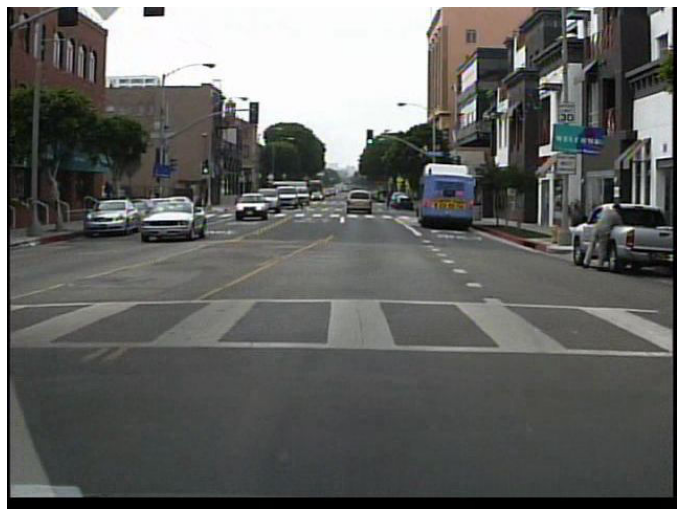

In [ ]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# coco.names is hardcoded somewhere in the detector
# the processed image would be save as file 'prediction.jpg'
img_path = "example/test07_V009_730.png"
!./darknet detect cfg/yolov4_custom_test.cfg backup/yolov4_custom_train_last.weights {img_path} -dont-show -ext_output

assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [ ]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# video processed
!python darknet_video.py -v ../V009.mp4 -c cfg/yolov4_custom_test.cfg -w backup/yolov4_custom_train_last.weights -o output1.mp4

 Try to load cfg: cfg/yolov4_custom_test.cfg, weights: backup/yolov4_custom_train_last.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 conv     64       3 x 3/ 2    640 x 480 x  32 ->  320 x 240 x  64 2.831 BF
   2 conv     64       1 x 1/ 1    320 x 240 x  64 ->  320 x 240 x  64 0.629 BF
   3 route  1 		                           ->  320 x 240 x  64 
   4 conv     64       1 x 1/ 1    320 x 240 x  64 ->  320 x 240 x  64 0.629 BF
   5 conv     32       1 x 1/ 1    320 x 240 x  64 ->  320 x 240 x  32 0.315 BF
   6 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 320 x 240 x  64 0.005 BF
   8 conv     64       1 x 1/ 1    320 x 240 x  64 ->  320 x 240

In [ ]:
!cp /content/drive/MyDrive/EECS_442_Project/Leo/YOLOv4/traffic-sign-to-test.mp4 /content/darknet_for_colab/examples/traffic-sign-to-test.mp4

In [ ]:
# video processed
!python darknet_video.py -v examples/traffic-sign-to-test.mp4 -c cfg/yolov4_custom_test.cfg -w backup/yolov4_custom_train_last.weights -o output2.mp4

 Try to load cfg: cfg/yolov4_custom_test.cfg, weights: backup/yolov4_custom_train_last.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208